Source:
=======
* https://www.lanacion.com.ar/2125275-rusia-2018-cuantos-sobres-de-figuritas-hacen-falta-para-llenar-el-album-del-mundial
* http://blogs.lanacion.com.ar/data/visualizaciones/simulando-cuantos-sobres-hacen-falta-para-llenar-el-album-del-mundial/
____________________________________________________

# **Simulando cuántos sobres hacen falta para llenar el álbum del mundial**

¿Cuántos sobres son necesarios para llenarlo?  
Para averiguarlo tenemos 2 maneras, acudir a la teoría estadística -cosa que no nos asusta, pero implica tener bastante conocimiento previo- o hacer una simulación con un programa de computadoras.  
Vamos por la segunda.

## **Comencemos la simulación**
Una [simulación](https://es.wikipedia.org/wiki/Simulaci%C3%B3n) -según Wikipedia- es un artificio contextual que referencia la investigación de una hipótesis o un conjunto de hipótesis de trabajo utilizando modelos para la enseñanza y el aprendizaje. En nuestro caso, la simulación tendrá como objetivo medir cuántos sobres (de 5 figuritas cada uno) se necesitan para llenar un álbum de 669. Y para ello necesitaremos construir un modelo computacional que contemplen los sobres, las figuritas y el álbum.

## **Python**
Haremos un pequeño programa en [Python](https://www.python.org/), un lenguaje de programación muy popular que tiene una sintaxis muy simple de entender (para quienes necesiten una ayuda extra, pueden leer estos [recursos introductorios](http://www.python.org.ar/wiki/AprendiendoPython) preparados por la [PyAr - Comunidad Python Argentina](http://www.python.org.ar/)).

In [8]:
print("Cuántos sobres se necesitan para llenar el album usando Python")

Cuántos sobres se necesitan para llenar el album usando Python


## **El azar y la computadora**
La simulación consiste en realizar numerosas corridas de un sistema estocástico, es decir, una situación que está regulada por la aleatoriedad o la suerte, como nuestro caso de ir abriendo sobres de figuritas sin saber de ante mano cuales son las que te van a tocar. Necesitaremos entonces alguna forma que simular el contenido de los sobres de manera azarosa utilizando nuestro modelo computacional. Y eso es todo un tema, porque las computadoras no saben de azar: justamente, son aparatos guiados por el determinismo de los ceros y unos.

Pero no desesperemos, este tema ha sido tratado desde hace mucho tiempo y Python implementa un módulo de generación de números pseudo-aleatorios, que a los efectos de nuestra simulación nos alcanza de sobra.

In [9]:
import random as rnd

"""
La funcion randint(a, b) devuelve un numero entero pseudo-aleatorio N talque 
a <= N <= b. 
"""
dado = rnd.randint(1, 6)

print(dado)

6


Para modelar el sobre de figuritas utilizaremos la funcion `sample(seq, k)`, que toma  k elementos de la secuencia seq; en nuestro caso 5 números del intervalo [0, 660).  
La forma de extraer los números es _sin reposición_, es decir, los sobres estarán compuestos por figuritas no repetidas.

In [10]:
# Para modelar el sobre utilizaremos la funcion sample. 
sobre = rnd.sample(range(669), 5)

print(sobre)

[458, 399, 498, 303, 488]


### **Otras librerías**
Para esta simulación vamos a incluir otras 2 librerías muy utilizadas en análisis de datos:
* [NumPy](http://www.numpy.org/) para el manejo de estructuras de datos eficiente (listas o vectores).
* [Matplotlib](https://matplotlib.org/) para realizar las gráficas.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Seteamos las constantes de la simulación, en nuestro caso las `FIGURITAS_POR_PAQUETE`, las `FIGURITAS_POR_ALBUM` y la `CANTIDAD_DE_CORRIDAS` que tendrá nuestra simulación.

Cuántas más corridas hagamos, más preciso será nuestro resultado, pero también más costoso computacionalmente será.  
Unas 10000 corridas está OK, y la simulación tardará unos 5-10 minutos.

In [12]:
# Las constantes de la simulacion
FIGURITAS_POR_PAQUETE = 5
FIGURITAS_POR_ALBUM = 669
CANTIDAD_DE_CORRIDAS = 1000

Iremos registrando cuántos sobres serán necesarios en cada corrida.

In [13]:
"""
Inicializo el vector simulacion
alli voy a ir registrando cuantos sobres necesito en cada corrida
"""
simulacion = np.empty(CANTIDAD_DE_CORRIDAS)

#### **Ciclo principal de la simulación**
El siguiente bloque es el ciclo principal de la simulación. Cuántas más corridas hacemos, más preciso será nuestra estimación.

In [14]:
# Voy a realizar tantas corridas como dice la constante CANTIDAD_DE_CORRIDAS
for i in range(CANTIDAD_DE_CORRIDAS):

    # Modelo el album vacio como un vector lleno de ceros
    album = np.zeros(FIGURITAS_POR_ALBUM, dtype=int)

    # En esta variable contabilizare cuantos sobres se necesitan
    cantidad_de_sobres = 0

    """
    Voy abriendo sobres nuevos hasta llenar el album.
    Si el vector contiene algun 0 en alguna posicion significa
    que aun no esta completo esa condicion la podemos expresar
    de muchas formas, la que elegi es min(album) == 0,
    tambien podria ser len(album[album == 0]) > 0
    """
    while min(album) == 0:
        # Un nuevo sobre formado por figuritas tomadas de manera aleatoria
        sobre = rnd.sample(range(FIGURITAS_POR_ALBUM),
                           FIGURITAS_POR_PAQUETE)

        """
        Voy llenando el album.
        Sumo 1 en cada posicion correspondiente a cada una de las
        figuritas del sobre
        """

        """
        Nota: para quienes conocen otros lenguajes de programacion, esta 
        operacion puede llegar a causar confusion. La libreria NumPy permite
        realizar operaciones sobre multiples indices a la vez.
        Aprovechenla, es muy util.
        """
        album[sobre] += 1

        # Incremento la cantidad de sobres en 1
        cantidad_de_sobres += 1

    """
    Para llenar este album he necesitado tantos sobres como
    lo dice cantidad_de_sobres
    """
    simulacion[i] = cantidad_de_sobres

### **Presentación visual de los resultados**
Luego de finalizar las corridas, tenemos muchos resultados.  
Presentaremos la información de una manera visual utilizando un histograma.

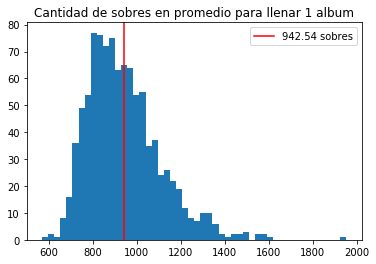

In [15]:
# Cuantos sobres necesitamos en promedio para llenar el album
sobres_promedio = simulacion.mean()

# Visualizamos la simulacion con un histograma de las corridas
plt.hist(simulacion, bins=50)
plt.axvline(sobres_promedio, color='r')
plt.legend(["%.2f sobres" % sobres_promedio])
plt.title("Cantidad de sobres en promedio para llenar 1 album")
plt.show()

### **Llenar el álbum costará...**
Por su condición de experimentos aleatorios, las simulaciones darán resultados levemente distintos, pero sí podemos ver que para llenar el álbum se necesitarán aproximadamente **941 sobres**. A $15 por sobre, llenar el álbum de esta manera costará... un ojo de la cara!

In [32]:
print("Llenar el album costará... %2.f pesos. Y qué hago con las %d repetidas!" %
      (sobres_promedio * 15, sobres_promedio * FIGURITAS_POR_PAQUETE - FIGURITAS_POR_ALBUM))

Llenar el album costará... 3710 pesos. Y qué hago con las 567 repetidas!


...más el costo de álbum en sí, que ya a esta altura parecen monedas.

### **Con amigos todo es mejor**
Como vimos, para llenar un álbum de **669 figuritas** necesitaremos aproximadamente **941 sobres** y nos sobrarán **4000 figuritas repetidas**. Con tantas repetidas estamos muy cerca de llenar un 2º y 3º álbum; y las que nos sobran las podemos cambiar con algún otro amigo que las necesite. Sin duda si nos juntamos con otros amigos, llenar todos los álbumes es mucho más rápido, barato y divertido.

#### **Cuánto costará llenar n álbumes**
Démosle una vuelta al problema y pensemos cuántos sobres son necesarios para llenar n álbumes.

Agreguemos la constante `CANTIDAD_DE_ALBUMES`

In [19]:
# Pensemos un grupo de 20 amigos que se juntan para llenar cada uno su album
CANTIDAD_DE_ALBUMES = 20

El vector simulación ahora registrará cuántos sobres se necesitan para llenar 1, 2, 3, ... , 20 álbumens. Ésto lo haremos con un vector de 2 dimensiones (cuando el vector tiene 2 dimensiones suele llamarse matriz, aunque cuando tiene 3 dimensiones o más, vuelve a llamarse vector, cosas que pasan...).

In [20]:
# Inicializo el vector simulacion_grupo con 2 dimensiones 
simulacion_grupo = np.zeros([CANTIDAD_DE_ALBUMES+1,
                             CANTIDAD_DE_CORRIDAS],
                            dtype=int)

#### **Ciclo principal de la simulación de grupo**
Con algunas pocos agregados podemos calcular cuántos sobres se necesitan para llenar *n* álbumes

In [23]:
"""
Voy a realizar muchas corridas, tantas como dice
la constante CANTIDAD_DE_CORRIDAS
"""
for i in range(CANTIDAD_DE_CORRIDAS):
    # Modelo el album vacio como un vector lleno de ceros
    album = np.zeros(FIGURITAS_POR_ALBUM, dtype=int)

    """
    En esta variable contabilizare cuantos sobres se necesitan
    para llenar 1...n albumes
    """
    cantidad_de_sobres = 0

    # Aqui voy a contabilizar cuando albumes estan llenos
    albumes_llenos = 0

    """
    A diferencia de la simulacion anterior, la condicion de corte sera
    cuando se llenen los n albumes. Eso lo podemos expresar asi:

      albumes_llenos < CANTIDAD_DE_ALBUMES
    """
    while albumes_llenos < CANTIDAD_DE_ALBUMES:
        # Un nuevo sobre formado por figuritas tomadas de manera aleatoria
        sobre = rnd.sample(range(FIGURITAS_POR_ALBUM),
                           FIGURITAS_POR_PAQUETE)

        # Voy llenando los albumes
        album[sobre] += 1

        # Incremento la cantidad de sobres en 1
        cantidad_de_sobres += 1

        # Si el min(album) se incremento, significa que se ha llenado un nuevo album.
        if albumes_llenos < min(album):
          # Hemos llenado un album nuevo
          albumes_llenos = min(album)

          # Registramos la cantidad de sobres
          simulacion_grupo[albumes_llenos, i] = cantidad_de_sobres


#### **Presentación visual de la simulación de grupos de amigos**
Ya recopilamos los resultados de muchas corridas, veamos qué tal nos fue para llenar *n* álbumes.

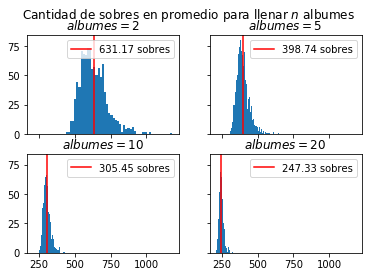

In [24]:
# Cuantos sobres necesitamos en promedio para llenar n-albumes usamos una matriz de histogramas
amigos = [2, 5, 10, 20]

fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True)

for ax, q in zip(axes.flat, amigos):
    simulacion = simulacion_grupo[q] / q
    sobres_promedio = simulacion.mean()
    ax.set_title('$albumes=%d $' % (q))
    ax.hist(simulacion, bins=50)
    ax.axvline(sobres_promedio, color='r')
    ax.legend(["%.2f sobres" % sobres_promedio])

fig.suptitle("Cantidad de sobres en promedio para llenar $n$ albumes")
plt.show()

Algo que suponíamos: cuántos más amigos tenemos, la cantidad de sobres por integrante del grupo para llenar su álbum disminuye. Y se acerca a la cantidad óptima de (`FIGURITAS_POR_ALBUM /  FIGURITAS_POR_PAQUETE`). No hace falta tener mucha suerte, sino muchos amigos. (Aunque tener muchos amigos es ser muy afortunado).

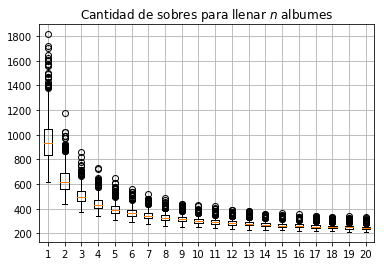

In [34]:
# Otra forma de visualizar la cantidad promedio de sobres para llenar n-albumes

plt.boxplot([simulacion_grupo[i] / i for i in range(1, CANTIDAD_DE_ALBUMES + 1)])
plt.title("Cantidad de sobres para llenar $n$ albumes")
plt.grid()
plt.show()

### **Conclusiones**
Como pudimos ver, para llenar **un álbum** necesitaremos aproximadamente **941 sobres**; pero para llenar **20 álbumes**, se necesitan un poco más de **4940 sobres**, lo que nos da **247 sobres por integrante**. Muchísimo menos.

In [33]:
print("Llenar %d albumes costara... %2.f pesos por integrante. Que bueno es tener amigos!" % (CANTIDAD_DE_ALBUMES, (simulacion_grupo[CANTIDAD_DE_ALBUMES]/CANTIDAD_DE_ALBUMES).mean() * 15))

Llenar 20 albumes costara... 3710 pesos por integrante. Que bueno es tener amigos!


Gracias por la atención y ¡Vamos Argentina!